# 1. Data Collection & Exploration

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Step 1: Load main telco dataset
telco = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
telco.head(2)

Unnamed: 0  customerID  gender SeniorCitizen          Partner  \
0           0  7590-VHVEG  Female        Junior     With Partner   
1           1  5575-GNVDE    Male        Junior  Without Partner   

           Dependents  tenure PhoneService     MultipleLines InternetService  \
0  Without Dependents       1           No  No phone service             DSL   
1  Without Dependents      34          Yes                No             DSL   

   ... StreamingMovies        Contract   PaperlessBilling     PaymentMethod  \
0  ...              No  Month-to-month  Paperless Billing  Electronic check   
1  ...              No        One year      Paper Billing      Mailed check   

  MonthlyCharges TotalCharges Churn MonthlyChargesGroup No. of Services  \
0          29.85        29.85    No   B. 20 => 30 Euros               1   
1          56.95      1889.50    No   E. 50 => 60 Euros               2   

               PartnerDependents  
0              With Partner only  
1  Without Partner or Dependents  

[2 rows x 25 columns]

In [3]:

# Step 2: Load user behavior
user_behavior = pd.read_csv("user_behavior_dataset.csv")
user_behavior.head(2)


User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   

   User Behavior Class  
0                    4  
1                    3

In [4]:
# Step 3: Load Census data
df= pd.read_csv("acs2015_census_tract_data.csv")
df.head(2)



CensusTract    State   County  TotalPop   Men  Women  Hispanic  White  \
0   1001020100  Alabama  Autauga      1948   940   1008       0.9   87.4   
1   1001020200  Alabama  Autauga      2156  1059   1097       0.8   40.4   

   Black  Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  Employed  \
0    7.7     0.3  ...   0.5          2.3         2.1         25.0       943   
1   53.3     0.0  ...   0.0          0.7         0.0         23.4       753   

   PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  
0         77.1        18.3           4.6         0.0           5.4  
1         77.0        16.9           6.1         0.0          13.3  

[2 rows x 37 columns]

In [5]:
df1= pd.read_csv("acs2017_census_tract_data.csv")
df1.head(2)

TractId    State          County  TotalPop   Men  Women  Hispanic  \
0  1001020100  Alabama  Autauga County      1845   899    946       2.4   
1  1001020200  Alabama  Autauga County      2172  1167   1005       1.1   

   White  Black  Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  \
0   86.3    5.2     0.0  ...   0.5          0.0         2.1         24.5   
1   41.6   54.5     0.0  ...   0.0          0.5         0.0         22.2   

   Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  
0       881         74.2        21.2           4.5         0.0           4.6  
1       852         75.9        15.0           9.0         0.0           3.4  

[2 rows x 37 columns]

In [6]:
df2= pd.read_csv("acs2015_county_data.csv")
df2.head(2)

CensusId    State   County  TotalPop    Men  Women  Hispanic  White  Black  \
0      1001  Alabama  Autauga     55221  26745  28476       2.6   75.8   18.5   
1      1003  Alabama  Baldwin    195121  95314  99807       4.5   83.1    9.5   

   Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  Employed  \
0     0.4  ...   0.5          1.3         1.8         26.5     23986   
1     0.6  ...   1.0          1.4         3.9         26.4     85953   

   PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  
0         73.6        20.9           5.5         0.0           7.6  
1         81.5        12.3           5.8         0.4           7.5  

[2 rows x 37 columns]

In [7]:
df3= pd.read_csv("acs2017_county_data.csv")
df3.head(2)

CountyId    State          County  TotalPop    Men   Women  Hispanic  \
0      1001  Alabama  Autauga County     55036  26899   28137       2.7   
1      1003  Alabama  Baldwin County    203360  99527  103833       4.4   

   White  Black  Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  \
0   75.4   18.9     0.3  ...   0.6          1.3         2.5         25.8   
1   83.1    9.5     0.8  ...   0.8          1.1         5.6         27.0   

   Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  
0     24112         74.1        20.2           5.6         0.1           5.2  
1     89527         80.7        12.9           6.3         0.1           5.5  

[2 rows x 37 columns]

In [8]:
telco_base_data=telco.copy()
telco_base_data.head()

Unnamed: 0  customerID  gender SeniorCitizen          Partner  \
0           0  7590-VHVEG  Female        Junior     With Partner   
1           1  5575-GNVDE    Male        Junior  Without Partner   
2           2  3668-QPYBK    Male        Junior  Without Partner   
3           3  7795-CFOCW    Male        Junior  Without Partner   
4           4  9237-HQITU  Female        Junior  Without Partner   

           Dependents  tenure PhoneService     MultipleLines InternetService  \
0  Without Dependents       1           No  No phone service             DSL   
1  Without Dependents      34          Yes                No             DSL   
2  Without Dependents       2          Yes                No             DSL   
3  Without Dependents      45           No  No phone service             DSL   
4  Without Dependents       2          Yes                No     Fiber optic   

   ... StreamingMovies        Contract   PaperlessBilling  \
0  ...              No  Month-to-month  Paperless Billing   
1  ...              No        One year      Paper Billing   
2  ...              No  Month-to-month  Paperless Billing   
3  ...              No        One year      Paper Billing   
4  ...              No  Month-to-month  Paperless Billing   

               PaymentMethod MonthlyCharges TotalCharges Churn  \
0           Electronic check          29.85        29.85    No   
1               Mailed check          56.95      1889.50    No   
2               Mailed check          53.85       108.15   Yes   
3  Bank transfer (automatic)          42.30      1840.75    No   
4           Electronic check          70.70       151.65   Yes   

  MonthlyChargesGroup No. of Services              PartnerDependents  
0   B. 20 => 30 Euros               1              With Partner only  
1   E. 50 => 60 Euros               2  Without Partner or Dependents  
2   E. 50 => 60 Euros               2  Without Partner or Dependents  
3   D. 40 => 50 Euros               3  Without Partner or Dependents  
4   G. 70 => 80 Euros               0  Without Partner or Dependents  

[5 rows x 25 columns]

In [9]:
telco_base_data.shape

(7043, 25)

In [10]:
telco_base_data.columns.values

array(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'MonthlyChargesGroup',
       'No. of Services', 'PartnerDependents'], dtype=object)

In [11]:
telco_base_data.isnull().sum()

Unnamed: 0              0
customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges           11
Churn                   0
MonthlyChargesGroup     0
No. of Services         0
PartnerDependents       0
dtype: int64

In [12]:
# Checking the data types of all the columns
telco_base_data.dtypes

Unnamed: 0               int64
customerID              object
gender                  object
SeniorCitizen           object
Partner                 object
Dependents              object
tenure                   int64
PhoneService            object
MultipleLines           object
InternetService         object
OnlineSecurity          object
OnlineBackup            object
DeviceProtection        object
TechSupport             object
StreamingTV             object
StreamingMovies         object
Contract                object
PaperlessBilling        object
PaymentMethod           object
MonthlyCharges         float64
TotalCharges           float64
Churn                   object
MonthlyChargesGroup     object
No. of Services          int64
PartnerDependents       object
dtype: object

In [13]:
# Check the descriptive statistics of numeric variables
telco_base_data.describe()

Unnamed: 0       tenure  MonthlyCharges  TotalCharges  No. of Services
count  7043.000000  7043.000000     7043.000000   7032.000000      7043.000000
mean   3521.000000    32.371149       64.761692   2283.300441         2.037910
std    2033.283305    24.559481       30.090047   2266.771362         1.847682
min       0.000000     0.000000       18.250000     18.800000         0.000000
25%    1760.500000     9.000000       35.500000    401.450000         0.000000
50%    3521.000000    29.000000       70.350000   1397.475000         2.000000
75%    5281.500000    55.000000       89.850000   3794.737500         3.000000
max    7042.000000    72.000000      118.750000   8684.800000         6.000000

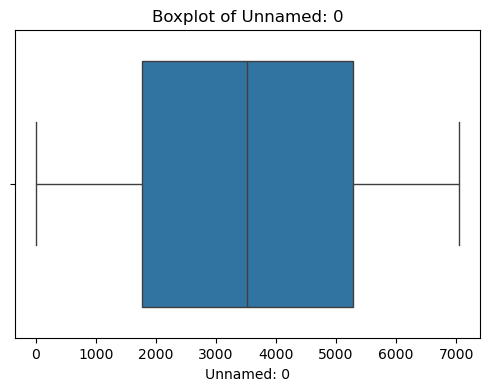

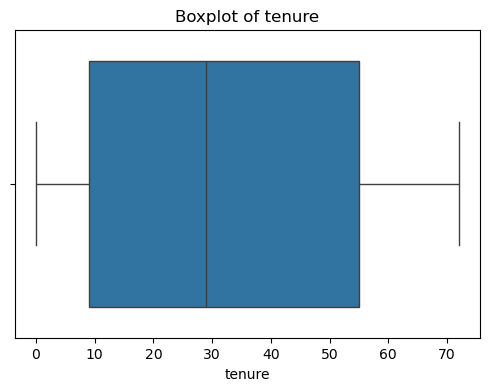

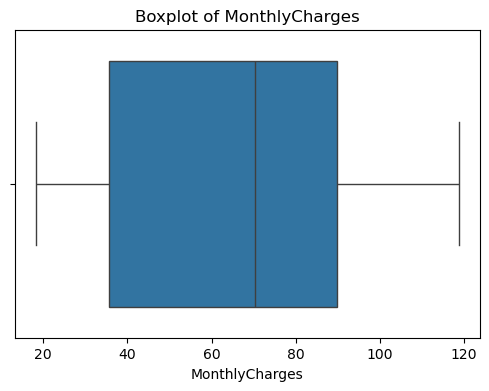

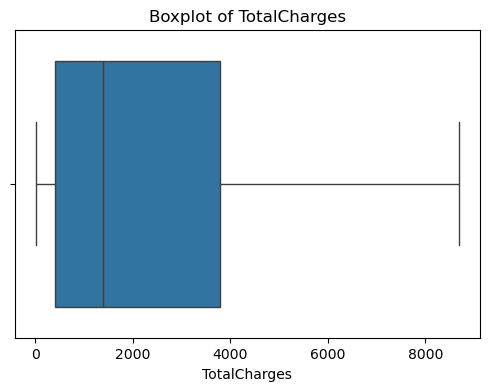

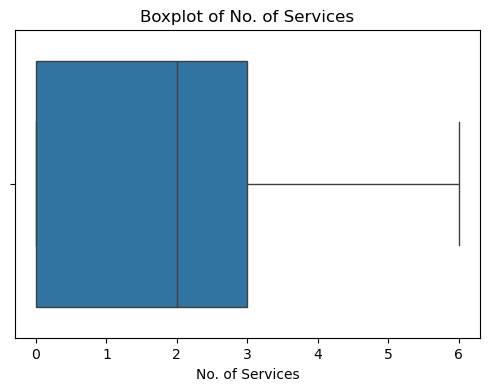

In [14]:
# Outlier detection using boxplots for numerical features
numerical_features = telco_base_data.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=telco_base_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [15]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.box(telco_base_data, x="Churn", y="TotalCharges", title="Box Plot - Plotly Express")
fig.show()

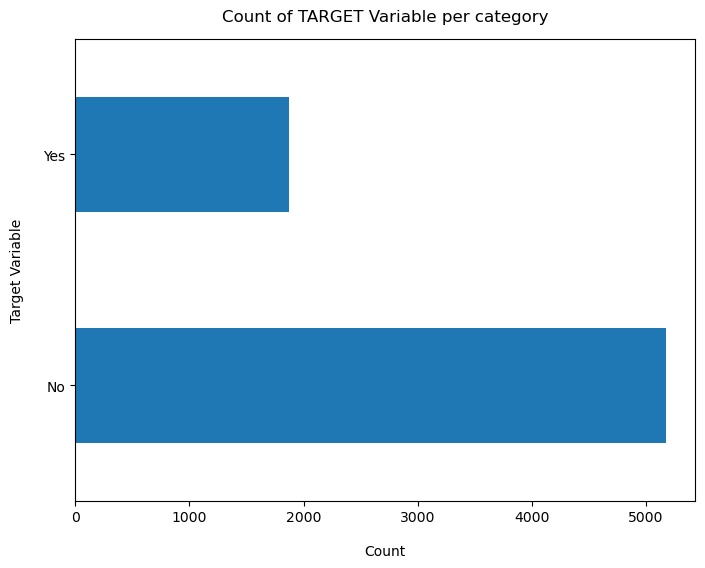

In [16]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);
plt.show()

In [17]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [18]:
telco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [19]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
telco_base_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7043 non-null   int64  
 1   customerID           7043 non-null   object 
 2   gender               7043 non-null   object 
 3   SeniorCitizen        7043 non-null   object 
 4   Partner              7043 non-null   object 
 5   Dependents           7043 non-null   object 
 6   tenure               7043 non-null   int64  
 7   PhoneService         7043 non-null   object 
 8   MultipleLines        7043 non-null   object 
 9   InternetService      7043 non-null   object 
 10  OnlineSecurity       7043 non-null   object 
 11  OnlineBackup         7043 non-null   object 
 12  DeviceProtection     7043 non-null   object 
 13  TechSupport          7043 non-null   object 
 14  StreamingTV          7043 non-null   object 
 15  StreamingMovies      7043 non-null   o

# 2. Data Preprocessing and Cleaning

In [20]:
import warnings
warnings.filterwarnings("ignore")

# •	Handle missing data (impute or remove).
telco_base_data['TotalCharges'] = pd.to_numeric(telco_base_data['TotalCharges'], errors='coerce')
telco_base_data['TotalCharges'].fillna(telco_base_data['TotalCharges'].mean(), inplace=True)  # Fill missing values with mean


In [21]:
telco_base_data.isnull().sum()

Unnamed: 0             0
customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
MonthlyChargesGroup    0
No. of Services        0
PartnerDependents      0
dtype: int64

In [22]:
telco_base_data.dtypes[telco_base_data.dtypes == 'object']

customerID             object
gender                 object
SeniorCitizen          object
Partner                object
Dependents             object
PhoneService           object
MultipleLines          object
InternetService        object
OnlineSecurity         object
OnlineBackup           object
DeviceProtection       object
TechSupport            object
StreamingTV            object
StreamingMovies        object
Contract               object
PaperlessBilling       object
PaymentMethod          object
Churn                  object
MonthlyChargesGroup    object
PartnerDependents      object
dtype: object

In [23]:
#drop column customerID and tenure
telco_base_data.drop(columns= ['customerID','Unnamed: 0'], axis=1, inplace=True)
telco_base_data.head()

gender SeniorCitizen          Partner          Dependents  tenure  \
0  Female        Junior     With Partner  Without Dependents       1   
1    Male        Junior  Without Partner  Without Dependents      34   
2    Male        Junior  Without Partner  Without Dependents       2   
3    Male        Junior  Without Partner  Without Dependents      45   
4  Female        Junior  Without Partner  Without Dependents       2   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

   ... StreamingMovies        Contract   PaperlessBilling  \
0  ...              No  Month-to-month  Paperless Billing   
1  ...              No        One year      Paper Billing   
2  ...              No  Month-to-month  Paperless Billing   
3  ...              No        One year      Paper Billing   
4  ...              No  Month-to-month  Paperless Billing   

               PaymentMethod MonthlyCharges TotalCharges Churn  \
0           Electronic check          29.85        29.85    No   
1               Mailed check          56.95      1889.50    No   
2               Mailed check          53.85       108.15   Yes   
3  Bank transfer (automatic)          42.30      1840.75    No   
4           Electronic check          70.70       151.65   Yes   

   MonthlyChargesGroup  No. of Services              PartnerDependents  
0    B. 20 => 30 Euros                1              With Partner only  
1    E. 50 => 60 Euros                2  Without Partner or Dependents  
2    E. 50 => 60 Euros                2  Without Partner or Dependents  
3    D. 40 => 50 Euros                3  Without Partner or Dependents  
4    G. 70 => 80 Euros                0  Without Partner or Dependents  

[5 rows x 23 columns]

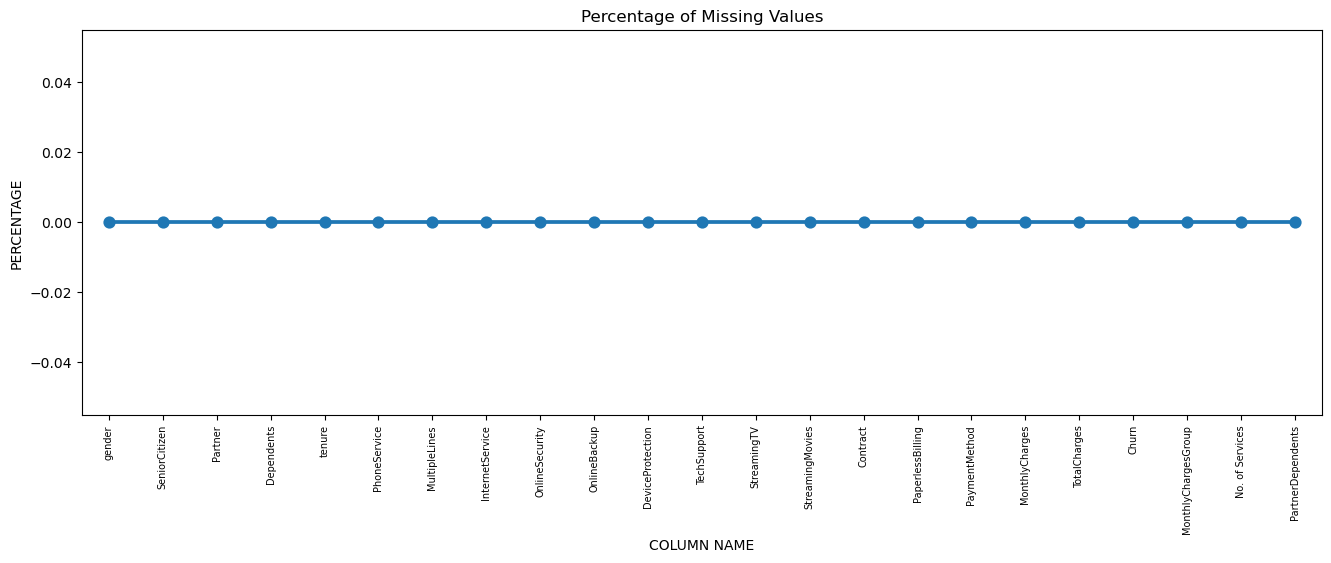

In [24]:
# Calculate missing values percentage
missing = pd.DataFrame((telco_base_data.isnull().sum())*100 / telco_base_data.shape[0]).reset_index()
missing.columns = ['column_name', 'percentage']

# Plot
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='column_name', y='percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMN NAME")
plt.show()

In [25]:
df=telco_base_data.copy()

In [26]:
# Convert 'Churn' from 'Yes'/'No' to 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [27]:
churn_rate_by_tenure = df.groupby('tenure')['Churn'].mean()


In [28]:
# •	Create derived metrics (e.g., average monthly usage).

#1. Average Monthly Usage:
df['AverageMonthlyUsage'] = df['TotalCharges'] / df['tenure']

#2. Tenure Group:
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, float('inf')], labels=['Short-term', 'Medium-term', 'Long-term'])

#3. Customer Value:
df['CustomerValue'] = df['MonthlyCharges'] * df['tenure']

#4. Contract Duration:
# Assuming 'Contract' is either 'Month-to-month', 'One year', or 'Two year'
contract_map = {'Month-to-month': 0, 'One year': 12, 'Two year': 24}
df['RemainingContractDuration'] = df['Contract'].map(contract_map) - df['tenure']

#5. Churn Rate:
churn_rate_by_tenure = df.groupby('TenureGroup')['Churn'].mean()

#6. Service Count:
df['ServiceCount'] = df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].notnull().sum(axis=1)

# 3. Exploratory Data Analysis (EDA)

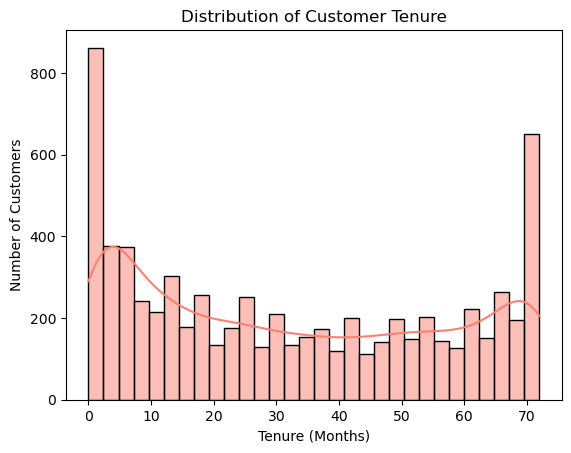

In [29]:
# •	Visualize customer distributions (tenure, services used).

#Distribution of Tenure
sns.histplot(df['tenure'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()



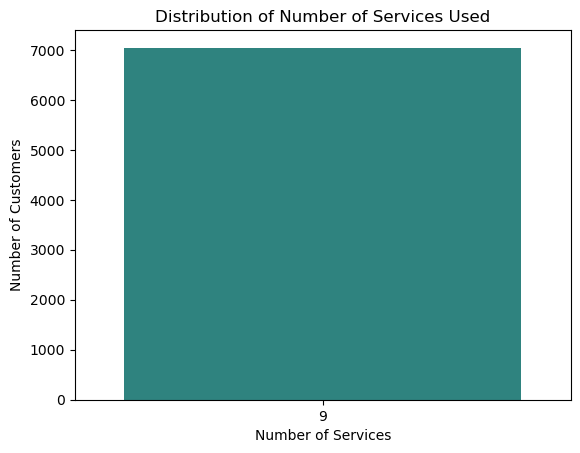

In [30]:
# Distribution of Services Used

# Make sure you've created ServiceCount beforehand
df['ServiceCount'] = df[['PhoneService', 'MultipleLines', 'InternetService', 
                         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                         'TechSupport', 'StreamingTV', 'StreamingMovies']].notnull().sum(axis=1)

sns.countplot(x='ServiceCount', data=df, palette='viridis')
plt.title('Distribution of Number of Services Used')
plt.xlabel('Number of Services')
plt.ylabel('Number of Customers')
plt.show()


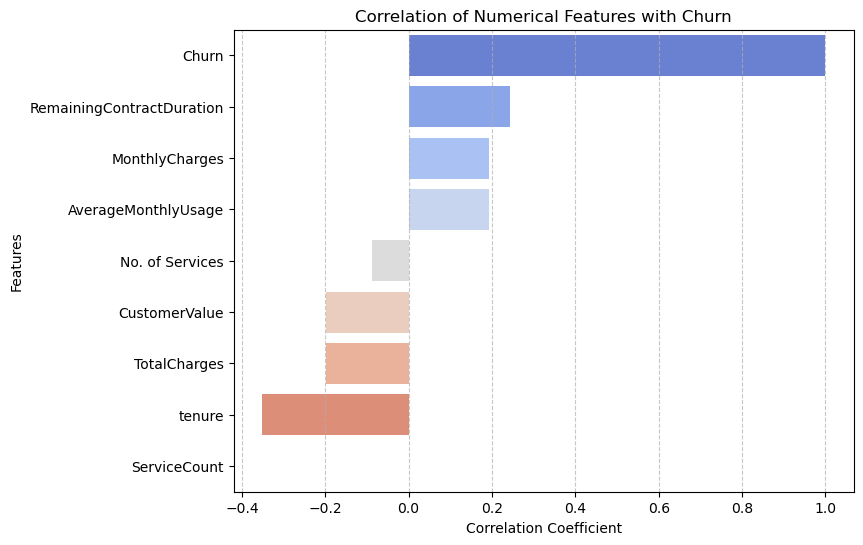

In [31]:
# •	Identify correlations between features and churn.

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute correlations with Churn
churn_corr = df[numerical_cols].corr()['Churn'].sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='coolwarm')
plt.title('Correlation of Numerical Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

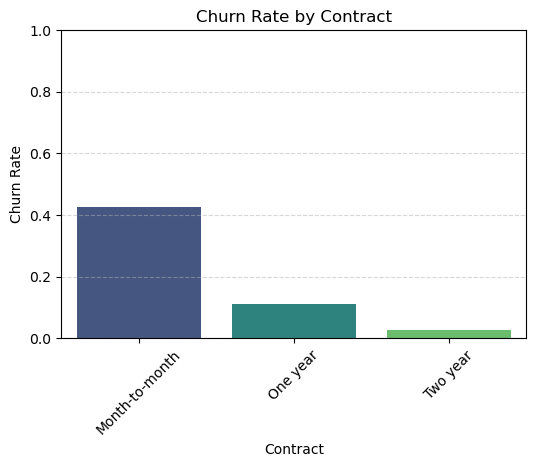

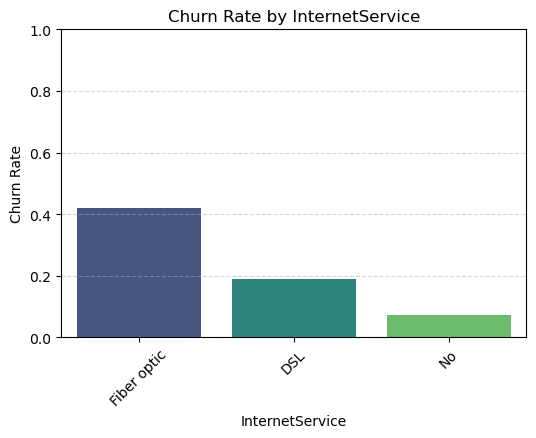

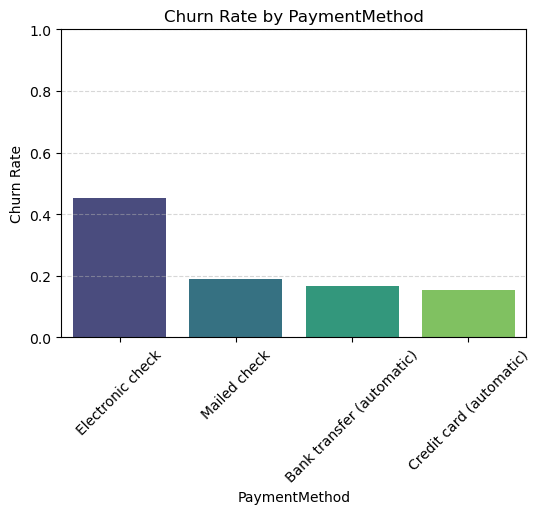

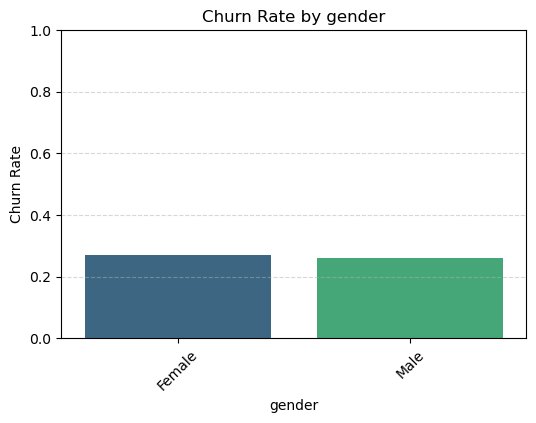

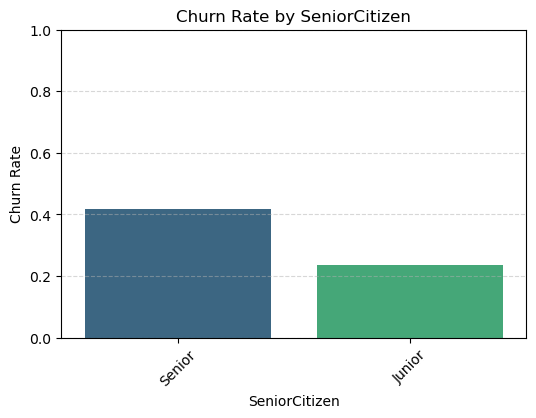

In [32]:
cat_cols = ['Contract', 'InternetService', 'PaymentMethod', 'gender', 'SeniorCitizen']

for col in cat_cols:
    churn_rate = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


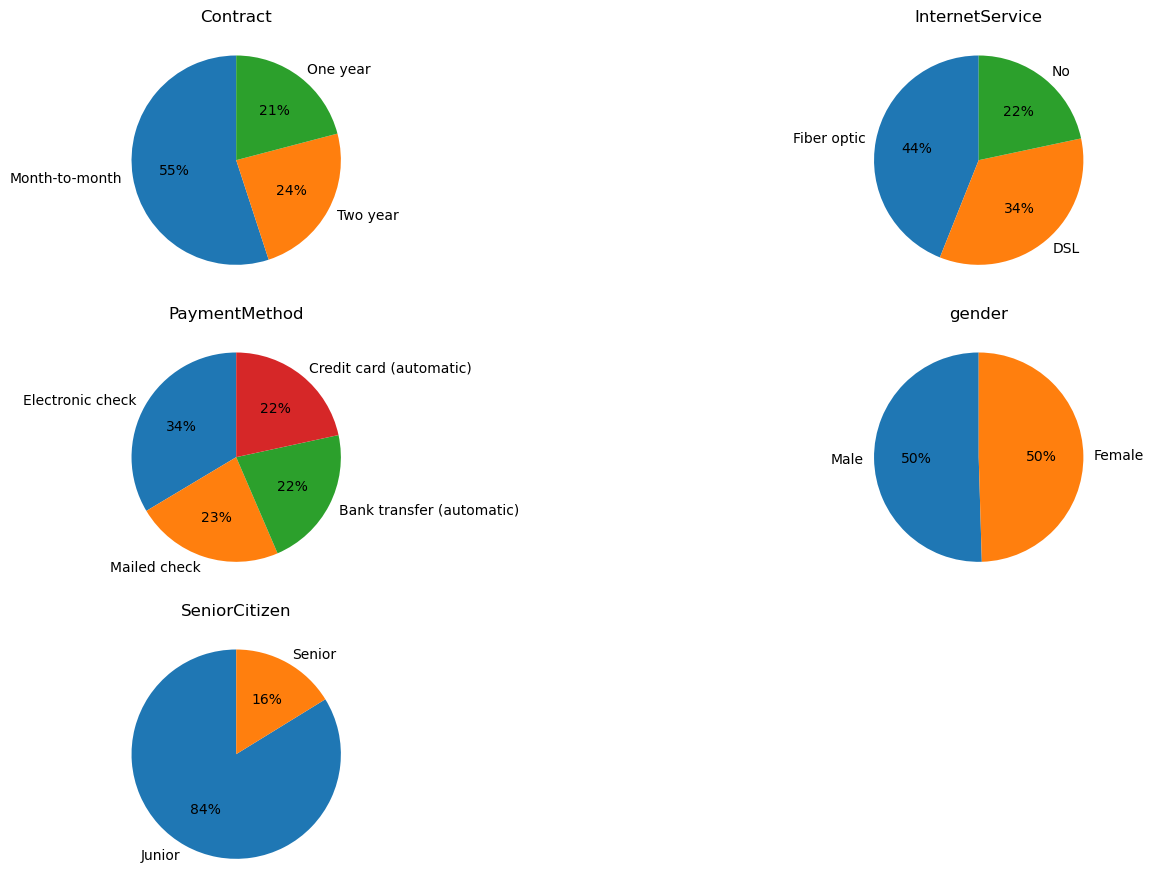

In [33]:
plt.figure(figsize=(15, 15)) 

for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 2, i) 
    df[col].value_counts().plot.pie(autopct="%1.0f%%", startangle=90)
    plt.title(col)
    plt.ylabel('')  

plt.tight_layout()
plt.show()

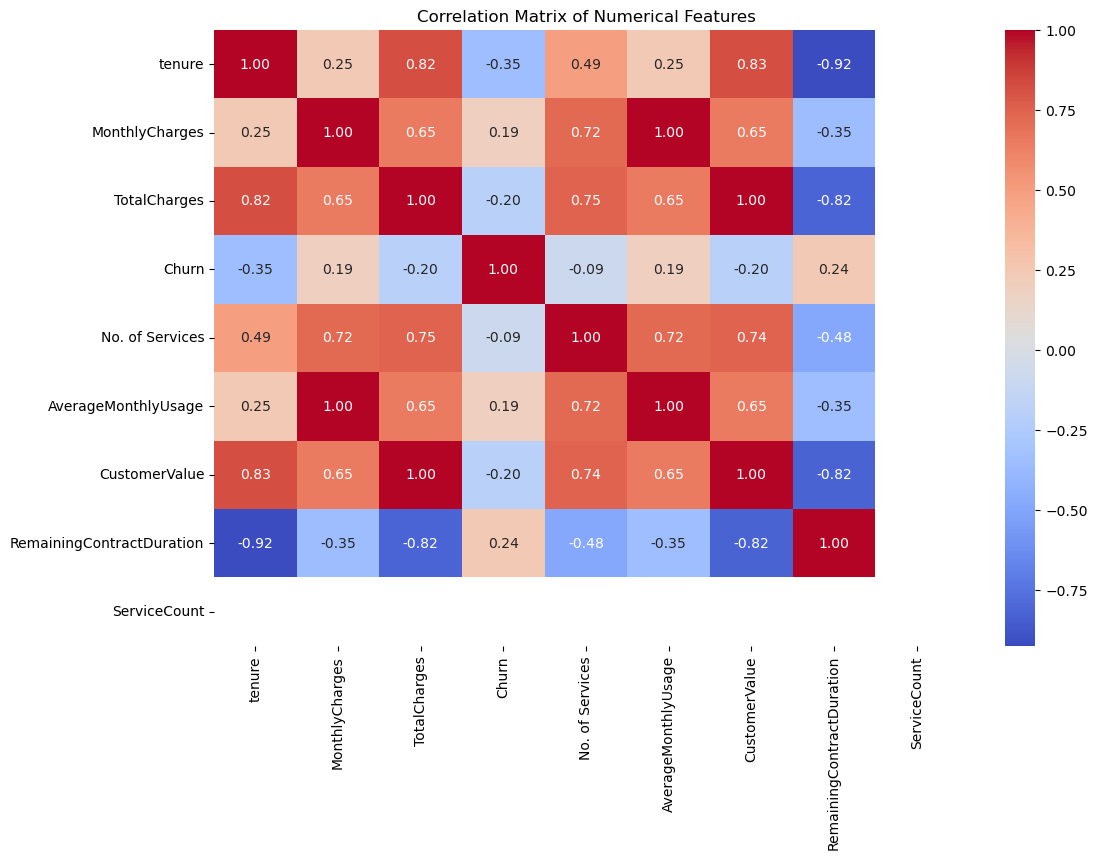

In [34]:
# Heatmap of Correlation Matrix 

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [35]:
# •	Segment customer base using clustering (e.g., K-Means, DBSCAN).

# Choose Features for Clustering

features = ['MonthlyCharges', 'tenure', 'TotalCharges', 'ServiceCount']


In [36]:
# Scale Features

from sklearn.preprocessing import StandardScaler

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


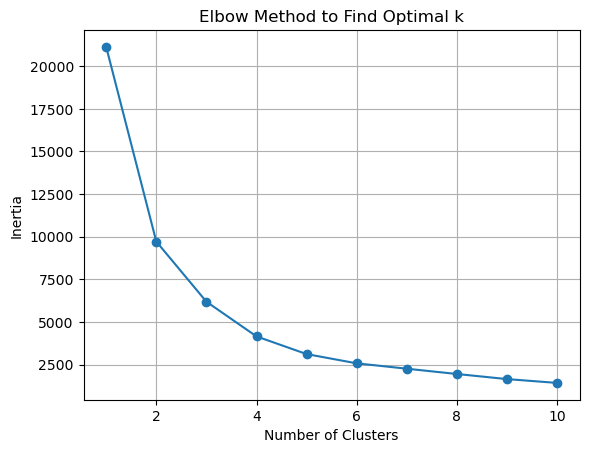

In [37]:
# Determine Optimal Number of Clusters (Elbow Method)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.grid(True)
plt.show()


In [38]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


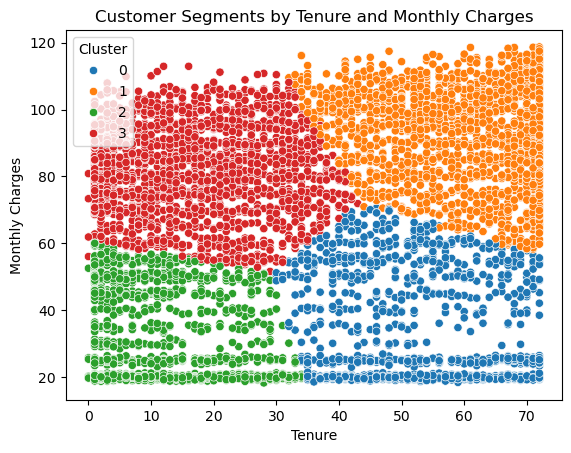

In [39]:
# Visualize Clusters

sns.scatterplot(x=df['tenure'], y=df['MonthlyCharges'], hue=df['Cluster'], palette='tab10')
plt.title('Customer Segments by Tenure and Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()


In [40]:
# Cluster Analysis:

df.groupby('Cluster')[features + ['Churn']].mean()


MonthlyCharges     tenure  TotalCharges  ServiceCount     Churn
Cluster                                                                 
0             34.801168  53.590830   1831.250389           9.0  0.050173
1             93.293691  59.569401   5551.335936           9.0  0.153523
2             31.761398  10.220917    311.720683           9.0  0.246769
3             80.763885  15.480508   1259.382392           9.0  0.481384

In [41]:
#  DBSCAN Clustering Step-by-Step

# Prepare the Data
features = ['MonthlyCharges', 'tenure', 'TotalCharges', 'ServiceCount']

# Convert TotalCharges if not numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

X = df[features]


In [42]:
# Scale the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [43]:
# Apply DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)


In [44]:
# Check Cluster Counts
df['DBSCAN_Cluster'].value_counts()


DBSCAN_Cluster
0    7043
Name: count, dtype: int64

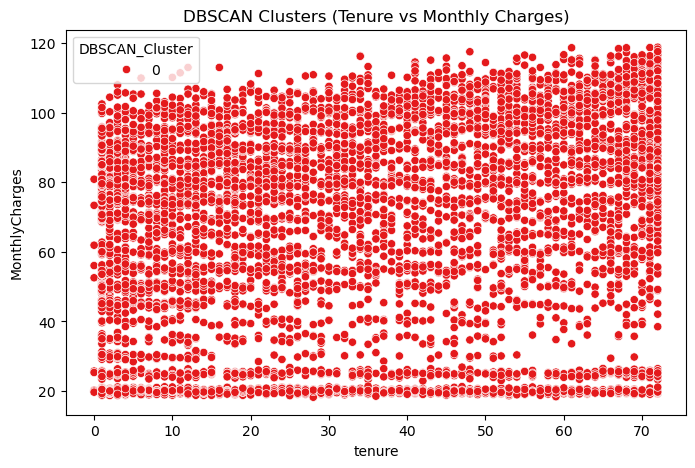

In [45]:
# Visualize Clusters

plt.figure(figsize=(8, 5))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='DBSCAN_Cluster', data=df, palette='Set1')
plt.title('DBSCAN Clusters (Tenure vs Monthly Charges)')
plt.show()


In [46]:
#  Cluster Profiling
df.groupby('DBSCAN_Cluster')[features + ['Churn']].mean()


MonthlyCharges     tenure  TotalCharges  ServiceCount    Churn
DBSCAN_Cluster                                                                
0                    64.761692  32.371149   2283.300441           9.0  0.26537

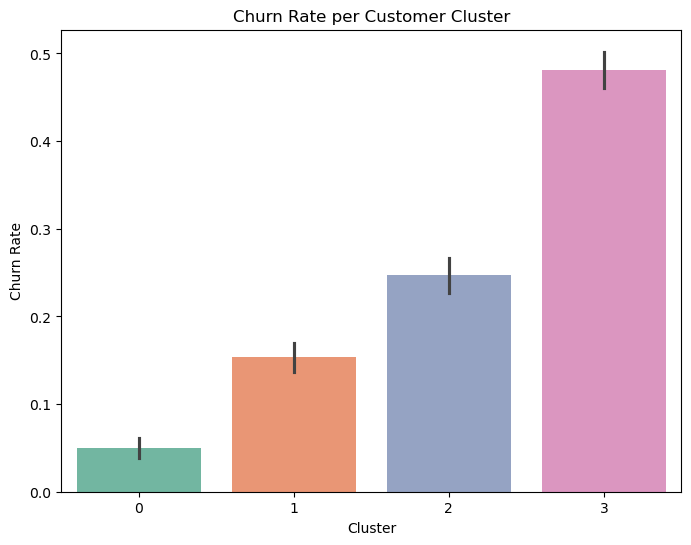

In [47]:
#  Visualize churn rate per cluster
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='Churn', data=df, palette='Set2')
plt.title('Churn Rate per Customer Cluster')
plt.ylabel('Churn Rate')
plt.xlabel('Cluster')
plt.show()

#  4. Predictive Modeling

In [48]:
df_encoded = pd.get_dummies(df.drop(columns=['DBSCAN_Cluster']), drop_first=True)

In [49]:
# •	Split data into train/test.

from sklearn.model_selection import train_test_split
import numpy as np

# Split first
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Now fix infinite and missing values in X
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

# Finally, split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)




In [50]:
!pip install xgboost


In [51]:
# •	Train models to predict churn (e.g., Logistic Regression, Random Forest, XGBoost).

# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [52]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [54]:
# •	Evaluate models using accuracy, F1-score, ROC AUC.

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n Evaluation: {name}")
    print(f"Accuracy     : {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score     : {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


In [55]:
evaluate_model(log_model, "Logistic Regression")
evaluate_model(rf_model, "Random Forest")
evaluate_model(xgb_model, "XGBoost")



 Evaluation: Logistic Regression
Accuracy     : 0.7991
F1 Score     : 0.5795
ROC AUC Score: 0.8440

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


 Evaluation: Random Forest
Accuracy     : 0.7878
F1 Score     : 0.5477
ROC AUC Score: 0.8247

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409


 Evaluation: XGBoost
Accuracy     : 0.7779
F1 Score     : 0.5444
ROC AUC Score: 0.8190

Classification 

# Customer Segmentation (Unsupervised Learning)

In [56]:
# Select Key Features
features = ['MonthlyCharges', 'TotalCharges', 'tenure', 'ServiceCount']
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])  # Clean invalid TotalCharges


In [57]:
# Scale the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df[features])


In [58]:
# K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(X)


In [59]:
# Profile Each Segment
segment_profiles = df.groupby('Segment')[features + ['Churn']].mean()
segment_counts = df['Segment'].value_counts()
display(segment_profiles)
display(segment_counts)


MonthlyCharges  TotalCharges     tenure  ServiceCount     Churn
Segment                                                                 
0             75.039276   1036.552537  13.256994           9.0  0.471093
1             89.680032   5245.050704  58.559291           9.0  0.153567
2             26.631444    813.480358  29.411846           9.0  0.124017

Segment
0    2681
1    2201
2    2161
Name: count, dtype: int64

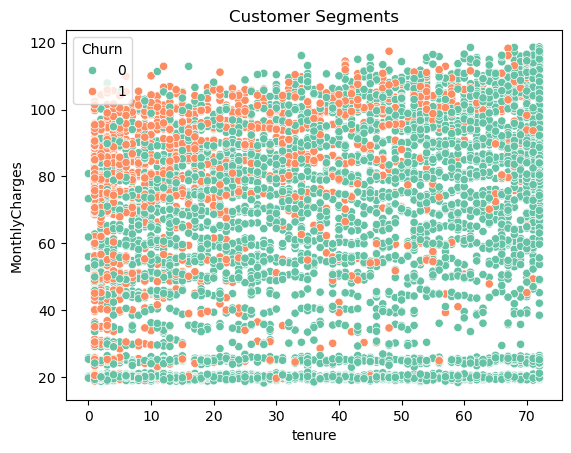

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', palette='Set2')
plt.title("Customer Segments")
plt.show()


In [61]:
# •	Visualize clusters using PCA or t-SNE.
# Prepare Feature Set

features = ['MonthlyCharges', 'TotalCharges', 'tenure', 'ServiceCount']
from sklearn.preprocessing import StandardScaler

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# t-SNE Visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

df['TSNE1'] = X_tsne[:, 0]
df['TSNE2'] = X_tsne[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TSNE1', y='TSNE2', palette='Set2', s=60)
plt.title("Customer Segments Visualized with t-SNE")
plt.show()


In [ ]:
# PCA Visualization
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', palette='Set2', s=60)
plt.title("Customer Segments Visualized with PCA")
plt.show()



#  6. Business Insights & Recommendations

In [ ]:
# •	Identify churn predictors (price sensitivity, customer support calls, etc.)

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

correlations = df.corr(numeric_only=True)['Churn'].drop('Churn').sort_values(ascending=False)
print(correlations)

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(14,10))

# Generate a mask for the upper triangle (optional: to make it cleaner)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Draw the heatmap
sns.heatmap(corr_matrix, 
            mask=mask, 
            cmap='coolwarm', 
            vmax=1.0, 
            vmin=-1.0, 
            center=0, 
            annot=True,    # show numbers
            fmt=".2f",      # 2 decimal places
            square=True, 
            linewidths=.5)

plt.title('Correlation Heatmap of Telco Dataset', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# Feature Importance from Random Forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


In [ ]:
# Feature Importance from XGBoost

from xgboost import plot_importance

plot_importance(xgb_model, max_num_features=10, height=0.5)
plt.title("Top 10 Features - XGBoost")
plt.show()


# 7. Reporting & Dashboard

In [ ]:
# Install 
!pip install dash plotly


import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Assuming you already have df with 'Churn', 'Cluster', 'MonthlyCharges', 'tenure', etc.

# Create Dash App
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Telecom Customer Churn Dashboard", style={'textAlign':'center'}),
    
    html.H2("Churn Trends"),
    dcc.Graph(id='churn-pie', figure=px.pie(df, names='Churn', title='Overall Churn Rate')),
    
    html.H2("Customer Segmentation"),
    dcc.Graph(id='cluster-scatter', figure=px.scatter(df, x='MonthlyCharges', y='tenure',
                                                      color='Cluster', title='Customer Segments by Charges and Tenure')),
    html.H2("Predictive Model Outputs"),
    html.P("Example: Predicting churn probabilities - add your model output here."),
    # (You could plot predicted probabilities if available)

    html.H2("Business Recommendations"),
    html.Ul([
        html.Li("✅ Loyalty programs for high-value customers"),
        html.Li("✅ Discounts and onboarding support for new at-risk customers"),
        html.Li("✅ Upsell services to medium-engagement customers"),
        html.Li("✅ Promote automatic payment methods to reduce churn")
    ])
   
    

   
])


In [ ]:
# Run server
if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
streamlit run churn_dashboard.py --server.port 8502
